In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif

### 01 - Questions.

**Goal.1:Using Logistic Regression to predict yearly earnings above 50,000$.**

**Goal.2.To identify income differences between gender.**

**Goal.3.To identify income differences between races.**

### 02 - Getting Data.

In [2]:
df = pd.read_csv('income.csv')
df

age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital-loss  hours-per-week native-country  income >50K  
0                 0              40  United-States            0  
1                 0              13  United-States            0  
2                 0              40  United-States            0  
3                 0              40  United-States            0  
4                 0              40           Cuba            0  
...             ...             ...            ...          ...  
32556             0              38  United-States            0  
32557             0              40  United-States            1  
32558             0              40  United-States            0  
32559             0              20  United-States            0  
32560             0              40  United-States            1  

[32561 rows x 14 columns]

### 03 - Cleaning Data and EDA

##### An observation selected first five from the dataset

In [3]:
df.head()

age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  income >50K  
0             0              40  United-States            0  
1             0              13  United-States            0  
2             0              40  United-States            0  
3             0              40  United-States            0  
4             0              40           Cuba            0

##### An observation selected last five from the dataset

In [4]:
df.tail()

age     workclass   education  education-num      marital-status  \
32556   27       Private  Assoc-acdm             12  Married-civ-spouse   
32557   40       Private     HS-grad              9  Married-civ-spouse   
32558   58       Private     HS-grad              9             Widowed   
32559   22       Private     HS-grad              9       Never-married   
32560   52  Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation relationship   race     sex  capital-gain  \
32556       Tech-support         Wife  White  Female             0   
32557  Machine-op-inspct      Husband  White    Male             0   
32558       Adm-clerical    Unmarried  White  Female             0   
32559       Adm-clerical    Own-child  White    Male             0   
32560    Exec-managerial         Wife  White  Female         15024   

       capital-loss  hours-per-week native-country  income >50K  
32556             0              38  United-States            0  
32557             0              40  United-States            1  
32558             0              40  United-States            0  
32559             0              20  United-States            0  
32560             0              40  United-States            1

##### An observation selected randomly from the dataset

In [5]:
df.sample(5)

age workclass     education  education-num      marital-status  \
19390   31   Private          11th              7  Married-civ-spouse   
27411   43   Private  Some-college             10  Married-civ-spouse   
4998    26   Private       HS-grad              9       Never-married   
17156   49   Private       HS-grad              9  Married-civ-spouse   
5334    49   Private       HS-grad              9  Married-civ-spouse   

            occupation   relationship   race   sex  capital-gain  \
19390     Craft-repair        Husband  White  Male             0   
27411            Sales        Husband  White  Male          7688   
4998      Adm-clerical  Not-in-family  White  Male             0   
17156     Craft-repair        Husband  White  Male             0   
5334   Exec-managerial        Husband  White  Male             0   

       capital-loss  hours-per-week native-country  income >50K  
19390             0              40         Mexico            0  
27411             0              40  United-States            1  
4998              0              60  United-States            0  
17156             0              40  United-States            1  
5334              0              40  United-States            0

##### Checking the shape which shows number of columns and rows

In [6]:
df.shape

(32561, 14)

In [7]:
len(df)

32561

##### View the columns names and rename them

In [8]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income >50K'],
      dtype='object')

In [9]:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace('-','_'))
df.columns = cols
print(df.columns)

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income >50k'],
      dtype='object')


In [10]:
cols

['age',
 'workclass',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income >50k']

In [11]:
df

age         workclass   education  education_num      marital_status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital_gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital_loss  hours_per_week native_country  income >50k  
0                 0              40  United-States            0  
1                 0              13  United-States            0  
2                 0              40  United-States            0  
3                 0              40  United-States            0  
4                 0              40           Cuba            0  
...             ...             ...            ...          ...  
32556             0              38  United-States            0  
32557             0              40  United-States            1  
32558             0              40  United-States            0  
32559             0              20  United-States            0  
32560             0              40  United-States            1  

[32561 rows x 14 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  31978 non-null  object
 13  income >50k     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


##### Column unique values helps explains the nature of the values in the column data set

In [13]:
counts = df.nunique()
counts

age                73
workclass           8
education          16
education_num      16
marital_status      7
occupation         14
relationship        6
race                5
sex                 2
capital_gain      119
capital_loss       92
hours_per_week     94
native_country     41
income >50k         2
dtype: int64

##### Rows unique values helps explains the nature of the values in the rows data set

In [14]:
print(df.nunique(axis=1))

0        13
1        11
2        12
3        12
4        12
         ..
32556    12
32557    12
32558    12
32559    12
32560    14
Length: 32561, dtype: int64


##### Summary statistics of the numerical features

In [15]:
df.describe()

age  education_num  capital_gain  capital_loss  \
count  32561.000000   32561.000000  32561.000000  32561.000000   
mean      38.581647      10.080679   1077.648844     87.303830   
std       13.640433       2.572720   7385.292085    402.960219   
min       17.000000       1.000000      0.000000      0.000000   
25%       28.000000       9.000000      0.000000      0.000000   
50%       37.000000      10.000000      0.000000      0.000000   
75%       48.000000      12.000000      0.000000      0.000000   
max       90.000000      16.000000  99999.000000   4356.000000   

       hours_per_week   income >50k  
count    32561.000000  32561.000000  
mean        40.437456      0.240810  
std         12.347429      0.427581  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

In [16]:
df.describe().T

count         mean          std   min   25%   50%   75%  \
age             32561.0    38.581647    13.640433  17.0  28.0  37.0  48.0   
education_num   32561.0    10.080679     2.572720   1.0   9.0  10.0  12.0   
capital_gain    32561.0  1077.648844  7385.292085   0.0   0.0   0.0   0.0   
capital_loss    32561.0    87.303830   402.960219   0.0   0.0   0.0   0.0   
hours_per_week  32561.0    40.437456    12.347429   1.0  40.0  40.0  45.0   
income >50k     32561.0     0.240810     0.427581   0.0   0.0   0.0   0.0   

                    max  
age                90.0  
education_num      16.0  
capital_gain    99999.0  
capital_loss     4356.0  
hours_per_week     99.0  
income >50k         1.0

##### Summary statistics of the categorical features

In [17]:
df.describe(include='object')

workclass education      marital_status      occupation relationship  \
count      30725     32561               32561           30718        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native_country  
count   32561  32561          31978  
unique      5      2             41  
top     White   Male  United-States  
freq    27816  21790          29170

In [18]:
df.describe(include='object').T

count unique                 top   freq
workclass       30725      8             Private  22696
education       32561     16             HS-grad  10501
marital_status  32561      7  Married-civ-spouse  14976
occupation      30718     14      Prof-specialty   4140
relationship    32561      6             Husband  13193
race            32561      5               White  27816
sex             32561      2                Male  21790
native_country  31978     41       United-States  29170

##### Summary statistics of the categorical values revealed that some variables have missing values, this can been displyed from the count.To dig deeper the following function help to show clearly variables with the missing values.

##### Checking the missing data

In [19]:
df.isna().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income >50k          0
dtype: int64

##### Checking missing values visually

<AxesSubplot:>

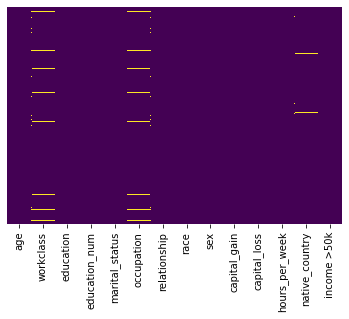

In [20]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

##### Replacing nan value by filling with the nearest number on its own column

In [21]:
df['workclass'] = df['workclass'].fillna(method='ffill').fillna(method='bfill')

In [22]:
df['occupation'] = df['occupation'].fillna(method='ffill').fillna(method='bfill')

In [23]:
df['native_country'] = df['native_country'].fillna(method='ffill').fillna(method='bfill')

In [24]:
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income >50k       0
dtype: int64

##### After replacing missing nan value, again null values are checked visually

<AxesSubplot:>

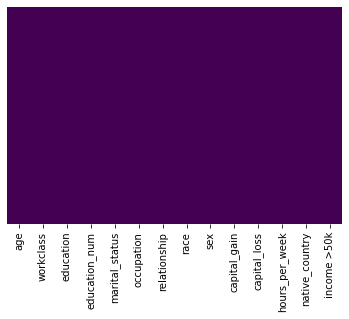

In [25]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

### Data Exploration

#### Categorical Data Visualization

In [26]:
df_nums = df._get_numeric_data()

In [27]:
df_cats = df.drop(columns=df_nums.columns)

In [28]:
df_cats

workclass   education      marital_status         occupation  \
0             State-gov   Bachelors       Never-married       Adm-clerical   
1      Self-emp-not-inc   Bachelors  Married-civ-spouse    Exec-managerial   
2               Private     HS-grad            Divorced  Handlers-cleaners   
3               Private        11th  Married-civ-spouse  Handlers-cleaners   
4               Private   Bachelors  Married-civ-spouse     Prof-specialty   
...                 ...         ...                 ...                ...   
32556           Private  Assoc-acdm  Married-civ-spouse       Tech-support   
32557           Private     HS-grad  Married-civ-spouse  Machine-op-inspct   
32558           Private     HS-grad             Widowed       Adm-clerical   
32559           Private     HS-grad       Never-married       Adm-clerical   
32560      Self-emp-inc     HS-grad  Married-civ-spouse    Exec-managerial   

        relationship   race     sex native_country  
0      Not-in-family  White    Male  United-States  
1            Husband  White    Male  United-States  
2      Not-in-family  White    Male  United-States  
3            Husband  Black    Male  United-States  
4               Wife  Black  Female           Cuba  
...              ...    ...     ...            ...  
32556           Wife  White  Female  United-States  
32557        Husband  White    Male  United-States  
32558      Unmarried  White  Female  United-States  
32559      Own-child  White    Male  United-States  
32560           Wife  White  Female  United-States  

[32561 rows x 8 columns]

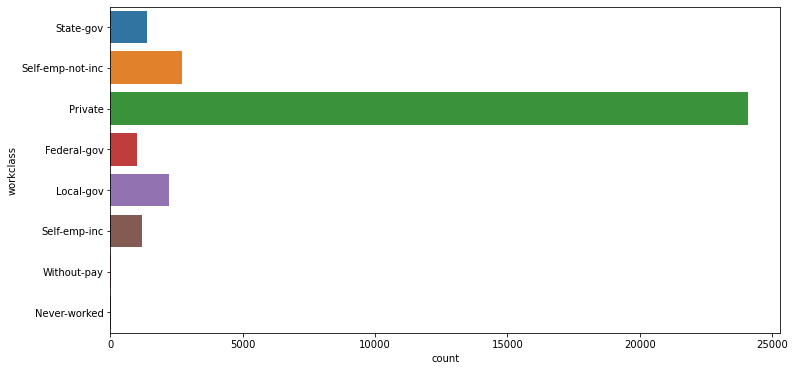

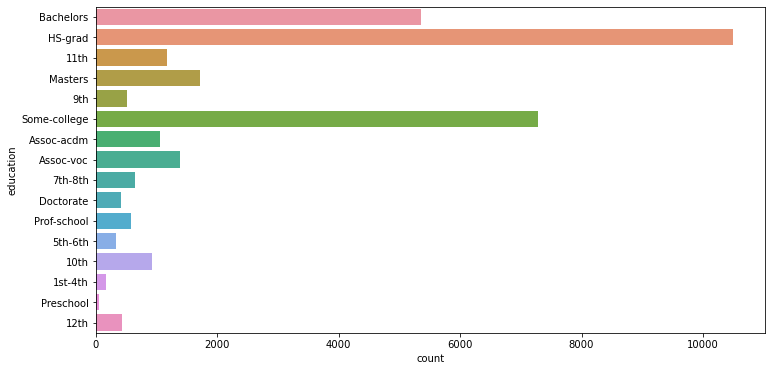

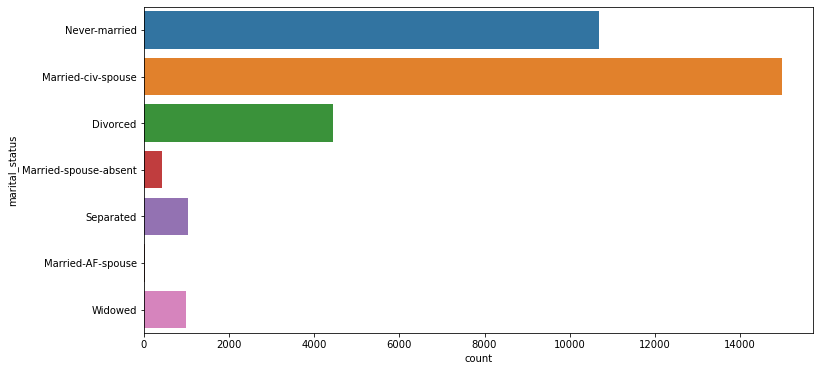

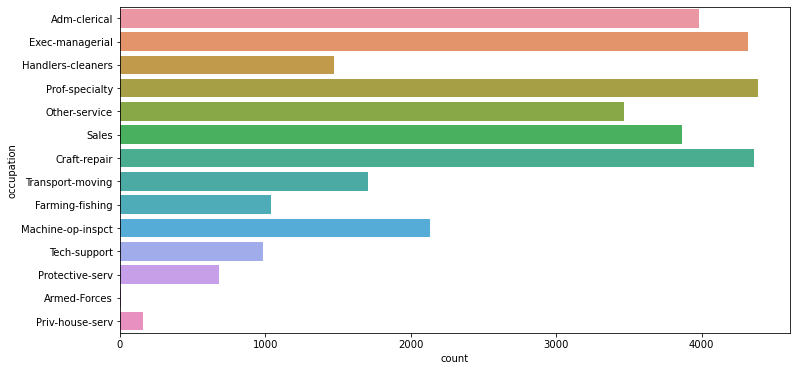

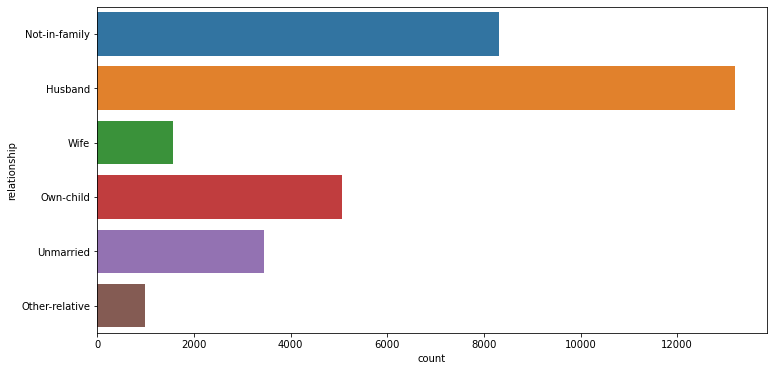

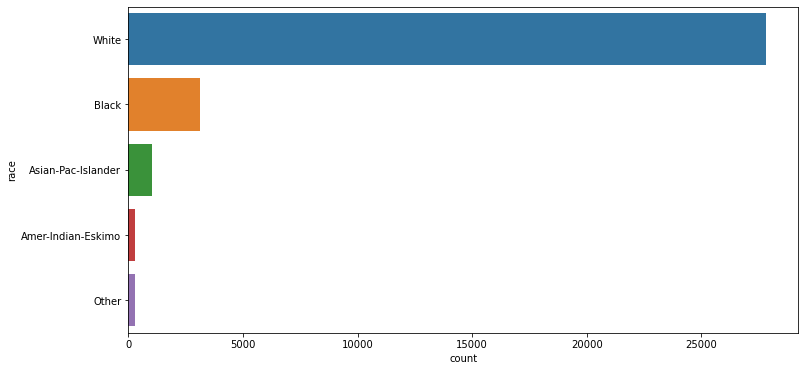

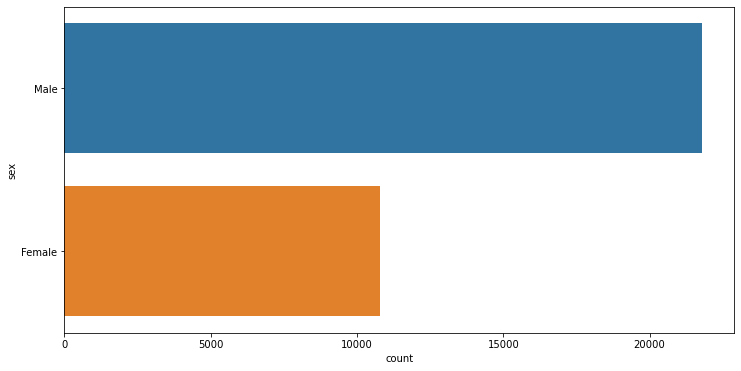

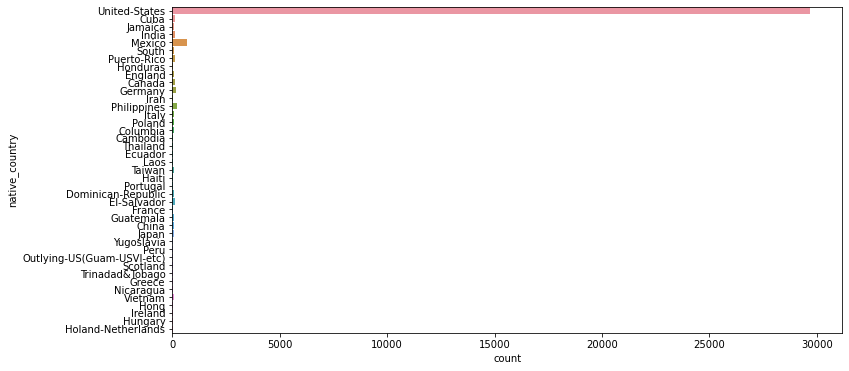

In [29]:
for column in df_cats.select_dtypes(include='object'):
    if df_cats[column].nunique():
        fig, ax = plt.subplots(figsize=(12,6))
        sns.countplot(y=column, data=df_cats)
        plt.show()

#### Numerical Data Visualization

In [30]:
df_nums = df._get_numeric_data()
df_nums 

age  education_num  capital_gain  capital_loss  hours_per_week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
32556   27             12             0             0              38   
32557   40              9             0             0              40   
32558   58              9             0             0              40   
32559   22              9             0             0              20   
32560   52              9         15024             0              40   

       income >50k  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
32556            0  
32557            1  
32558            0  
32559            0  
32560            1  

[32561 rows x 6 columns]

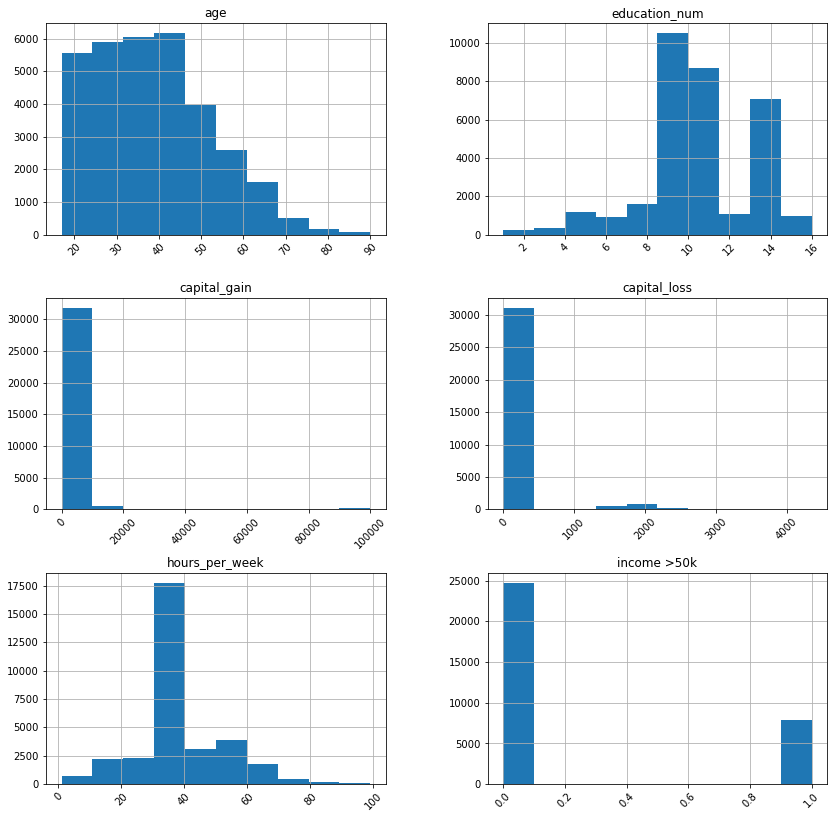

In [31]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

##### Histogram bar plot revealed that income is categorical

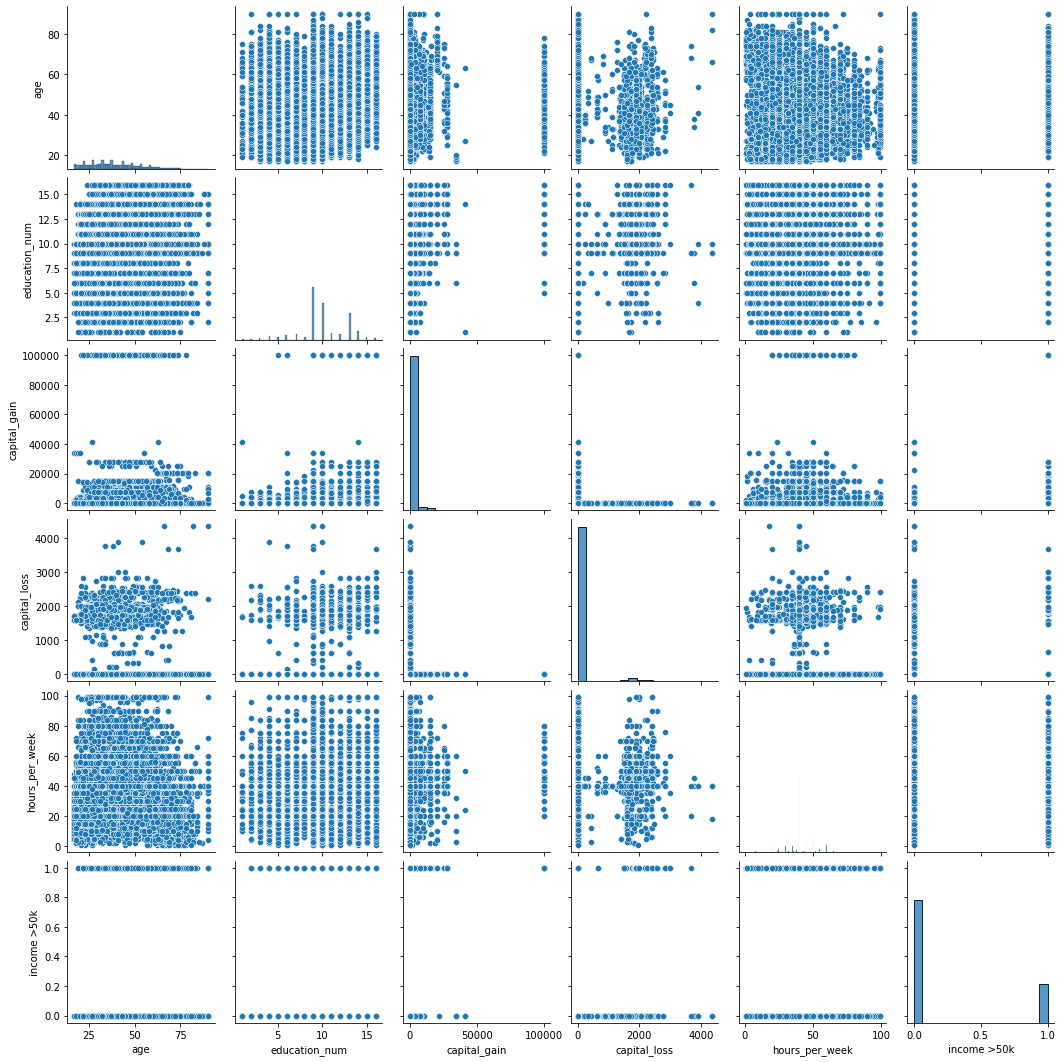

In [32]:
sns.pairplot(df_nums)

### Visualization of target variable and independent variables

##### Get income counts

In [33]:
df['income >50k'].value_counts()

0    24720
1     7841
Name: income >50k, dtype: int64

##### Visualize the counts of income

<AxesSubplot:xlabel='income >50k', ylabel='count'>

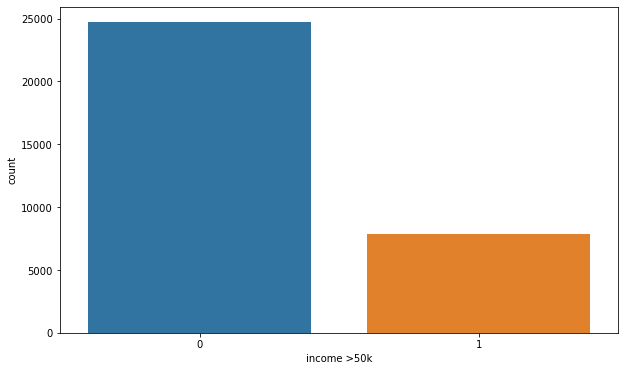

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(df['income >50k'])

##### Renaming income column

In [35]:
people_income=df.rename(columns={'income >50k':'income_more_than_50k_dollar'})

In [36]:
people_income

age         workclass   education  education_num      marital_status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital_gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital_loss  hours_per_week native_country  \
0                 0              40  United-States   
1                 0              13  United-States   
2                 0              40  United-States   
3                 0              40  United-States   
4                 0              40           Cuba   
...             ...             ...            ...   
32556             0              38  United-States   
32557             0              40  United-States   
32558             0              40  United-States   
32559             0              20  United-States   
32560             0              40  United-States   

       income_more_than_50k_dollar  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
32556                            0  
32557                            1  
32558                            0  
32559                            0  
32560                            1  

[32561 rows x 14 columns]

In [37]:
people_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          32561 non-null  int64 
 1   workclass                    32561 non-null  object
 2   education                    32561 non-null  object
 3   education_num                32561 non-null  int64 
 4   marital_status               32561 non-null  object
 5   occupation                   32561 non-null  object
 6   relationship                 32561 non-null  object
 7   race                         32561 non-null  object
 8   sex                          32561 non-null  object
 9   capital_gain                 32561 non-null  int64 
 10  capital_loss                 32561 non-null  int64 
 11  hours_per_week               32561 non-null  int64 
 12  native_country               32561 non-null  object
 13  income_more_than_50k_dollar  32

##### Percentage of people receiving above and below 50k dollars annually

In [38]:
num_below_50k = people_income[people_income.income_more_than_50k_dollar == 0].shape[0]
num_above_50k = people_income[people_income.income_more_than_50k_dollar == 1].shape[0]

##### Percentage of people earning above 50k_dollars annually

In [39]:
(num_above_50k/(num_above_50k+num_below_50k)*100, '% of people earning above 50k_dollar.')

(24.080955744602438, '% of people earning above 50k_dollar.')

##### Percentage of people earning below 50k_dollars annually

In [40]:
(num_below_50k/(num_below_50k+num_above_50k)*100, '% of people earning below 50k_dollar.')

(75.91904425539757, '% of people earning below 50k_dollar.')

##### Comparative visualization for male and female for income receipt of more than 50k_dollars annually

<AxesSubplot:xlabel='sex', ylabel='count'>

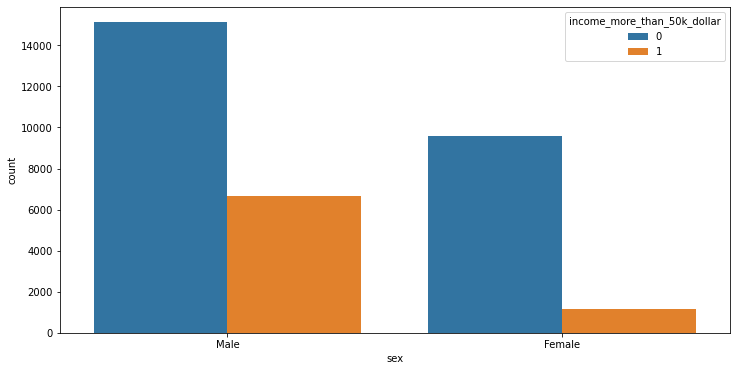

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x ='sex',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and age

<AxesSubplot:xlabel='age', ylabel='count'>

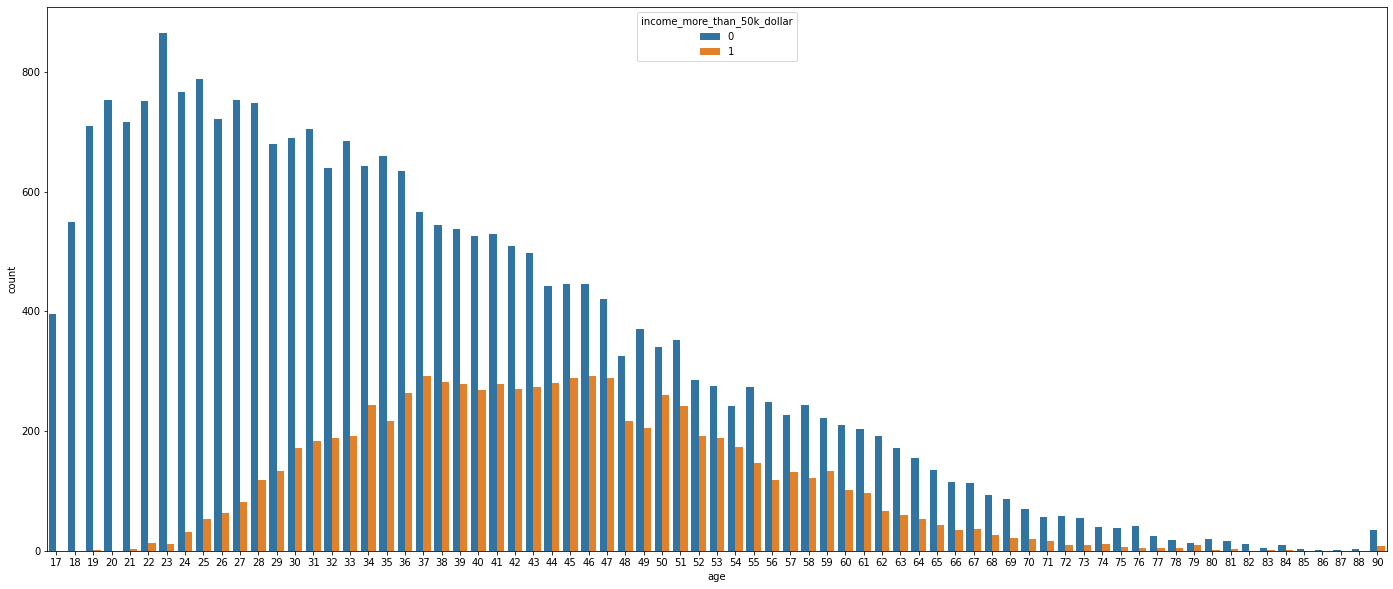

In [42]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='age',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and race

<AxesSubplot:xlabel='race', ylabel='count'>

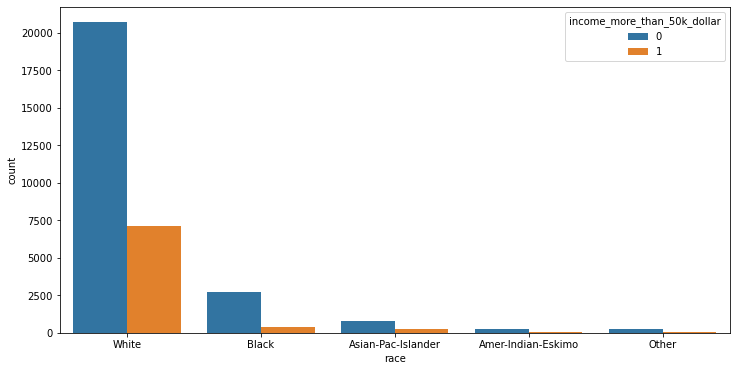

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x ='race',hue='income_more_than_50k_dollar' , data = people_income )


##### Visualize income of more than 50k dollars and marital status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

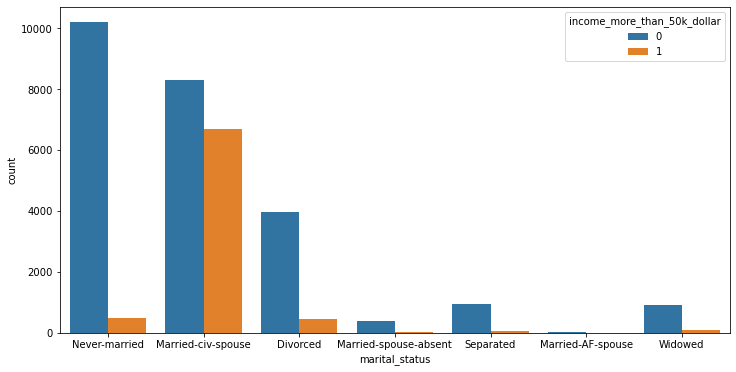

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x ='marital_status',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and hours per week

<AxesSubplot:xlabel='hours_per_week', ylabel='count'>

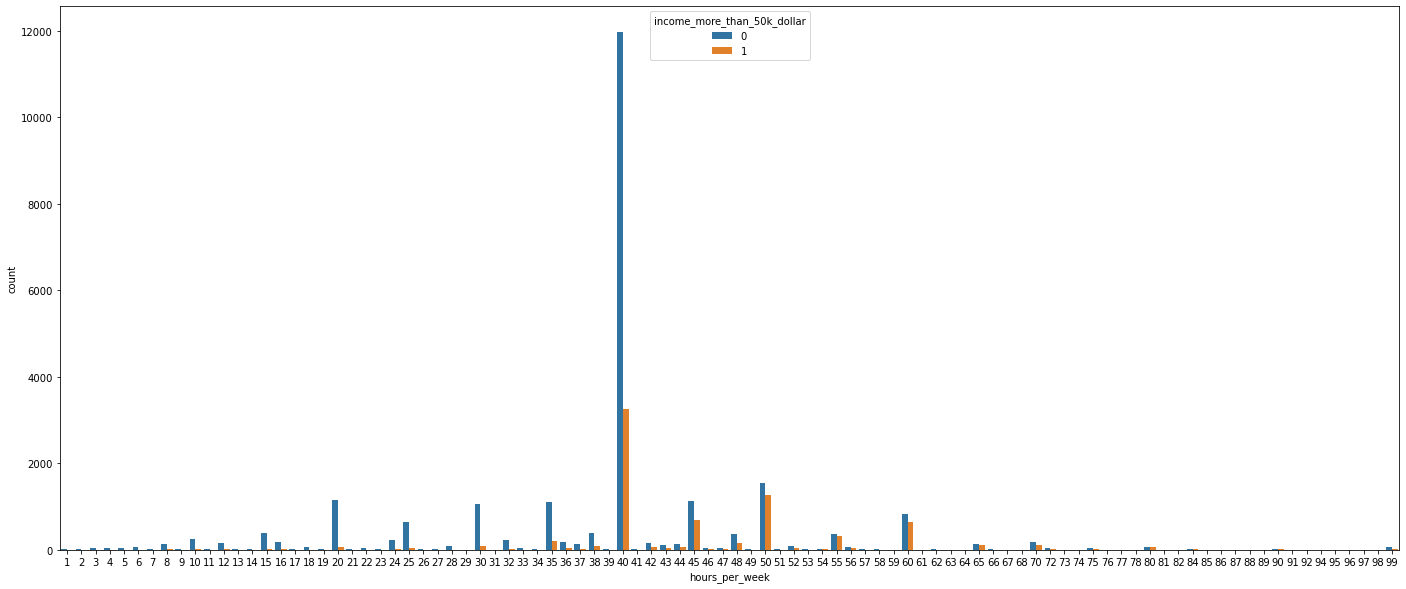

In [45]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='hours_per_week',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and education

<AxesSubplot:xlabel='education', ylabel='count'>

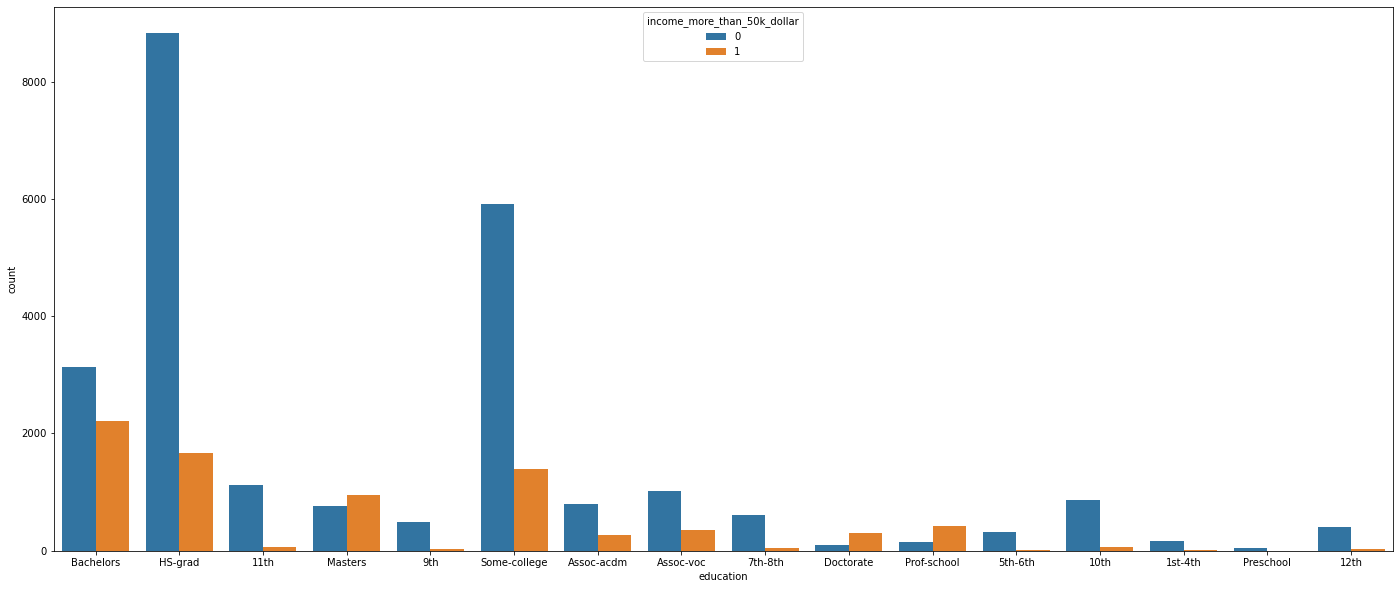

In [46]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='education',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and education num

<AxesSubplot:xlabel='education_num', ylabel='count'>

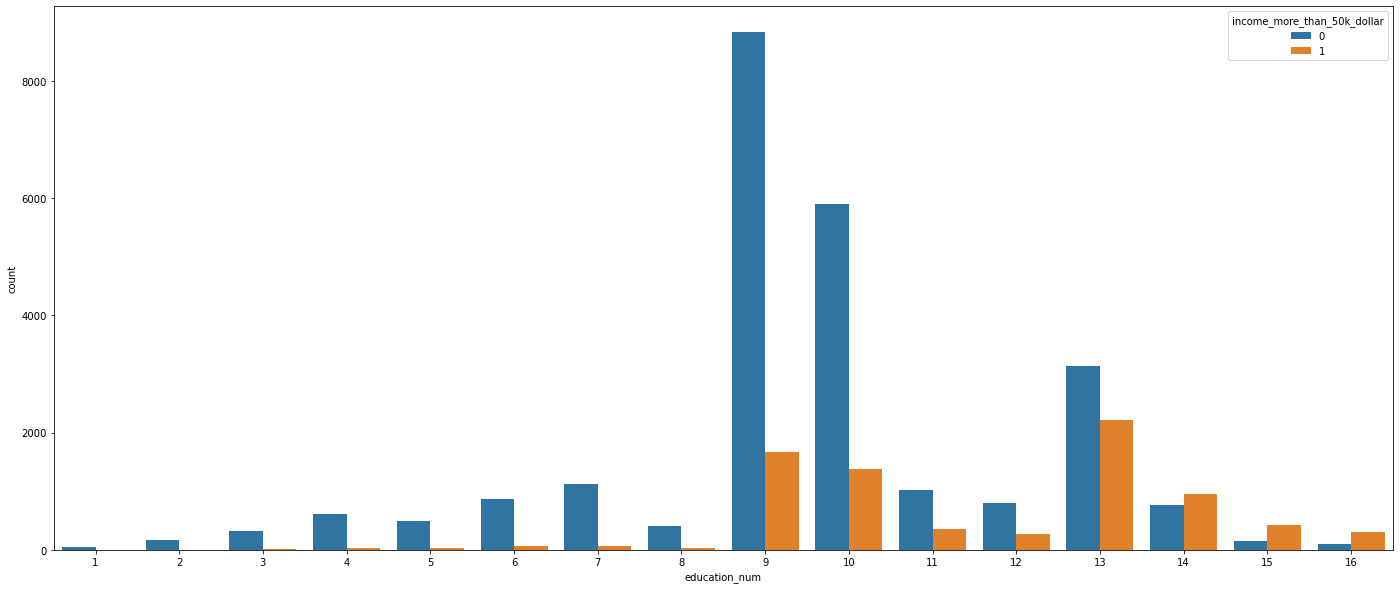

In [47]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='education_num',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and occupation

<AxesSubplot:xlabel='occupation', ylabel='count'>

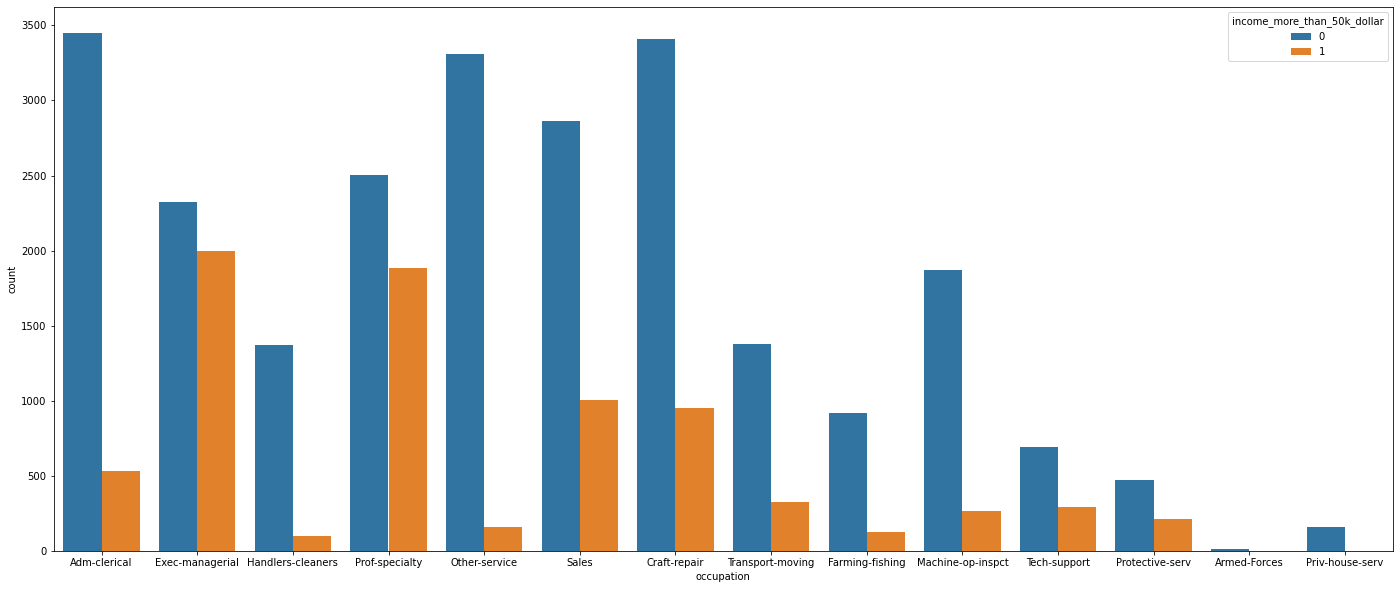

In [48]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='occupation',hue='income_more_than_50k_dollar' , data = people_income )

##### Visualize income of more than 50k dollars and relationship

<AxesSubplot:xlabel='relationship', ylabel='count'>

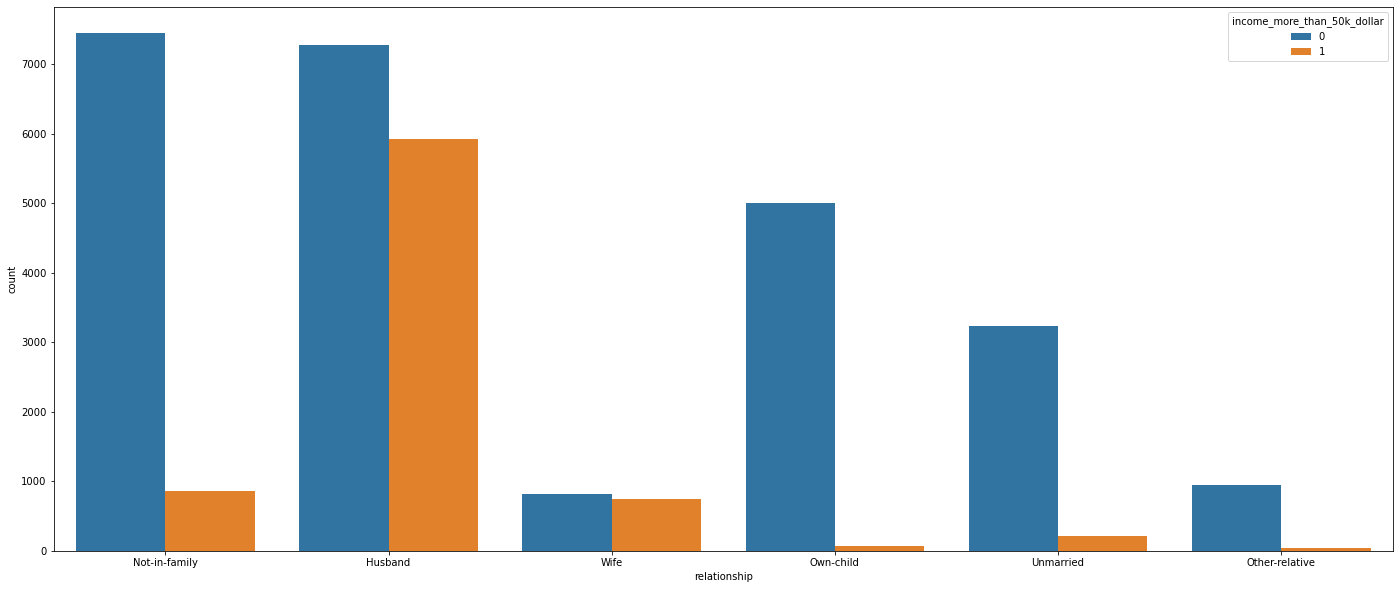

In [49]:
fig, ax = plt.subplots(figsize=(24,10))
sns.countplot(x ='relationship',hue='income_more_than_50k_dollar' , data = people_income )

#### Since some of the features can not well be explored under matplotlib and seaborn, pywedge help to explore relationships between these features in details

In [50]:
!pip install pywedge

In [51]:
import pywedge as pw

In [52]:
Charts_pywedge = pw.Pywedge_Charts(people_income, c=None, y = 'income_more_than_50k_dollar')

In [53]:
charts = Charts_pywedge.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [54]:
charts = Charts_pywedge.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

##### To be able to see every detail well from the displayed graphs, jupyter notebook display need to be maximized, the following HTML code helps to maximize.

In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style"))

##### Loading png from Tableau via local storage, showing population native_country visually through the map.

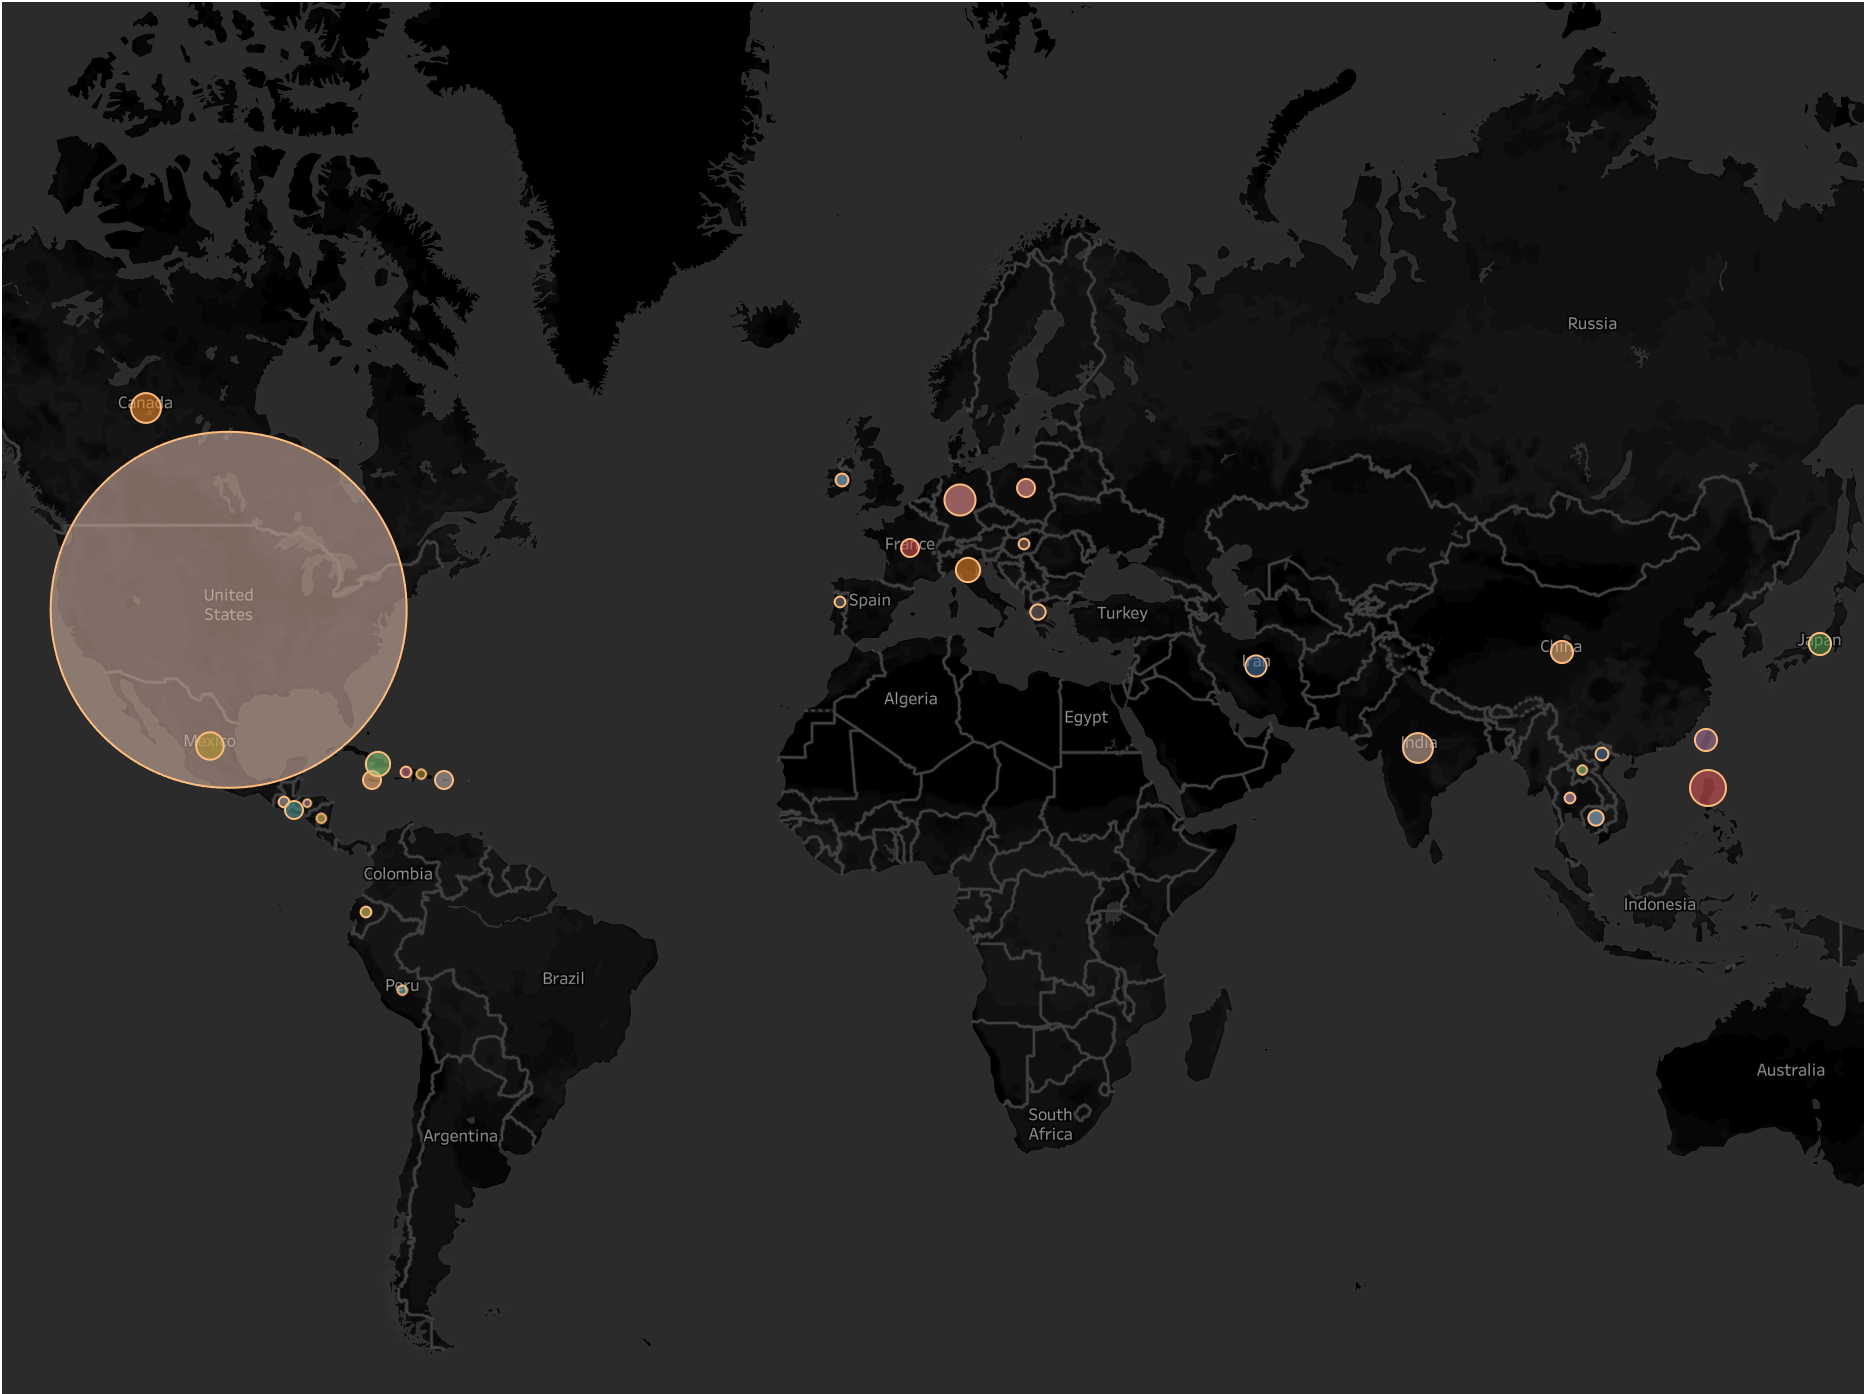

In [56]:
from IPython.display import Image
Image(filename = "Native country.png", width = 1300, height = 600)

In [57]:
people_income

age         workclass   education  education_num      marital_status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital_gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital_loss  hours_per_week native_country  \
0                 0              40  United-States   
1                 0              13  United-States   
2                 0              40  United-States   
3                 0              40  United-States   
4                 0              40           Cuba   
...             ...             ...            ...   
32556             0              38  United-States   
32557             0              40  United-States   
32558             0              40  United-States   
32559             0              20  United-States   
32560             0              40  United-States   

       income_more_than_50k_dollar  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
...                            ...  
32556                            0  
32557                            1  
32558                            0  
32559                            0  
32560                            1  

[32561 rows x 14 columns]

##### Correlation of both heat map and data frame

In [58]:
corr = people_income.corr()

In [59]:
people_income.corr()

age  education_num  capital_gain  \
age                          1.000000       0.036527      0.077674   
education_num                0.036527       1.000000      0.122630   
capital_gain                 0.077674       0.122630      1.000000   
capital_loss                 0.057775       0.079923     -0.031615   
hours_per_week               0.068756       0.148123      0.078409   
income_more_than_50k_dollar  0.234037       0.335154      0.223329   

                             capital_loss  hours_per_week  \
age                              0.057775        0.068756   
education_num                    0.079923        0.148123   
capital_gain                    -0.031615        0.078409   
capital_loss                     1.000000        0.054256   
hours_per_week                   0.054256        1.000000   
income_more_than_50k_dollar      0.150526        0.229689   

                             income_more_than_50k_dollar  
age                                             0.234037  
education_num                                   0.335154  
capital_gain                                    0.223329  
capital_loss                                    0.150526  
hours_per_week                                  0.229689  
income_more_than_50k_dollar                     1.000000

##### Install Plotly to visualize with interactive correlation plot

In [60]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [61]:
import plotly.express as px

In [62]:
fig = px.imshow(people_income.corr())
figsize=(24, 10)
fig.show()

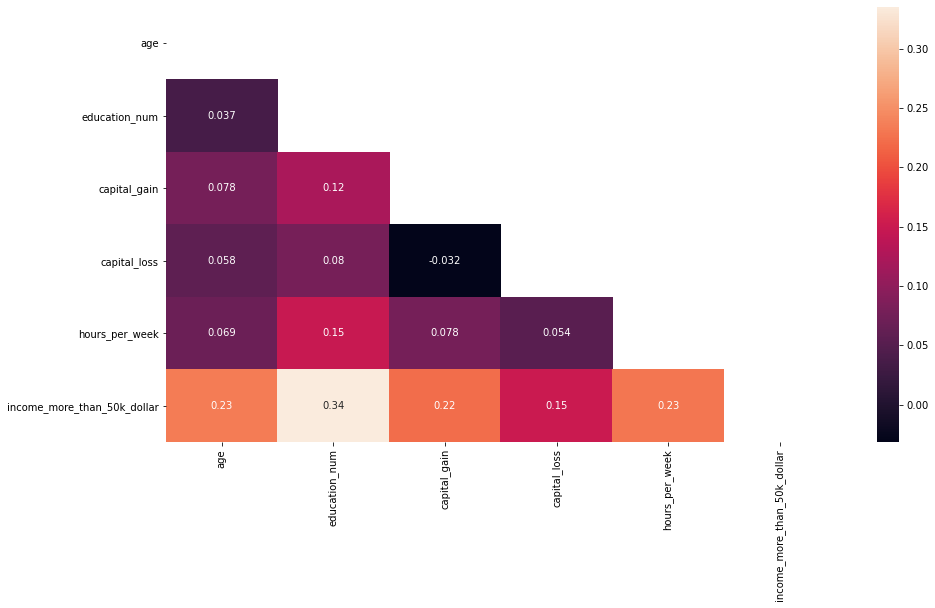

In [63]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
plt.show()

### 04 - Data Pre Processing

In [64]:
pre_processed = pd.get_dummies(data = people_income,columns=["marital_status","workclass","education","occupation","relationship","race","sex","native_country"],drop_first=True)

In [65]:
pre_processed

age  education_num  capital_gain  capital_loss  hours_per_week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
32556   27             12             0             0              38   
32557   40              9             0             0              40   
32558   58              9             0             0              40   
32559   22              9             0             0              20   
32560   52              9         15024             0              40   

       income_more_than_50k_dollar  marital_status_Married-AF-spouse  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   
...                            ...                               ...   
32556                            0                                 0   
32557                            1                                 0   
32558                            0                                 0   
32559                            0                                 0   
32560                            1                                 0   

       marital_status_Married-civ-spouse  \
0                                      0   
1                                      1   
2                                      0   
3                                      1   
4                                      1   
...                                  ...   
32556                                  1   
32557                                  1   
32558                                  0   
32559                                  0   
32560                                  1   

       marital_status_Married-spouse-absent  marital_status_Never-married  \
0                                         0                             1   
1                                         0                             0   
2                                         0                             0   
3                                         0                             0   
4                                         0                             0   
...                                     ...                           ...   
32556                                     0                             0   
32557                                     0                             0   
32558                                     0                             0   
32559                                     0                             1   
32560                                     0                             0   

       marital_status_Separated  marital_status_Widowed  workclass_Local-gov  \
0                             0                       0                    0   
1                             0                       0                    0   
2                             0                       0                    0   
3                             0                       0                    0   
4                             0                       0                    0   
...                         ...                     ...                  ...   
32556                         0                       0                    0   
32557                         0                       0                    0   
32558                         0                       1                    0   
32559      

##### Scale the data

In [66]:
X = pre_processed.drop('income_more_than_50k_dollar', axis=1) # This data set has features only without dependent variable
y = pre_processed['income_more_than_50k_dollar']

The data is scaled (also known as feature scale), is applied since on the data set there is different set of values or distict values.This function help to scale them to the same level.The output from feature scaling is standardization or normalization.

##### Standardizing the features

In [125]:
X = StandardScaler().fit_transform(X)

##### Train and Split the data

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

The train help to to fit the machine learning model, while test Used to evaluate the fit of machine learning model.

In [69]:
classification = LogisticRegression(random_state=0, solver ='lbfgs', max_iter = 400, multi_class = 'ovr').fit(X_train, y_train)

In [70]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.8476845596364083

##### This tells us 84% of the dependent variable (Income) can be explained by our independent variables.

### 05 - Confusion Matrix after applying Logistic Regression

In [73]:
y.value_counts()

0    24720
1     7841
Name: income_more_than_50k_dollar, dtype: int64

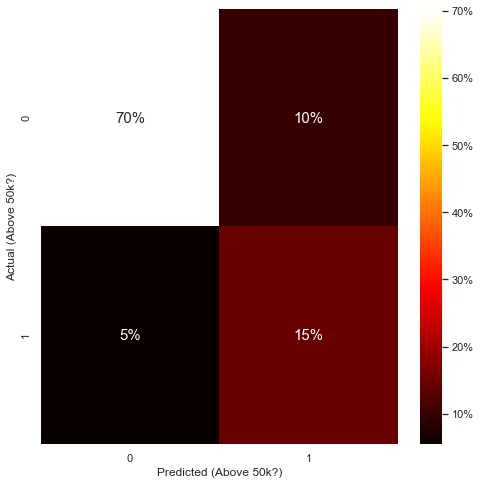

In [74]:
y_pred=classification.predict(X_test)


cnfmat = confusion_matrix(y_pred, y_test) # putting in place confusion matrix


df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test),index = np.unique(y_test)) # Dataframe for a confusion matrix is put in place. Hence easy to plot in seaborn

                                              
df_cm.index.name = 'Actual (Above 50k?)' # Giving column and index names to our df
df_cm.columns.name = 'Predicted (Above 50k?)'


sns.set(font_scale=1) # Size of the plot


from matplotlib.ticker import FuncFormatter #convert the values into percentages
fmt = lambda x,pos: '{:.0%}'.format(x)

# set plot size
fig, ax = plt.subplots(figsize=(8,8))


sns.heatmap(df_cm/df_cm.sum().sum(),  # plot all values into percentages  also plot the heatmap for confusion matrix
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );


In [75]:
classification.score(X, y)

0.8509873775375449

### 06 - SMOTE

##### This helps to  get rid of imbalance of the data

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

1    24720
0    24720
Name: income_more_than_50k_dollar, dtype: int64

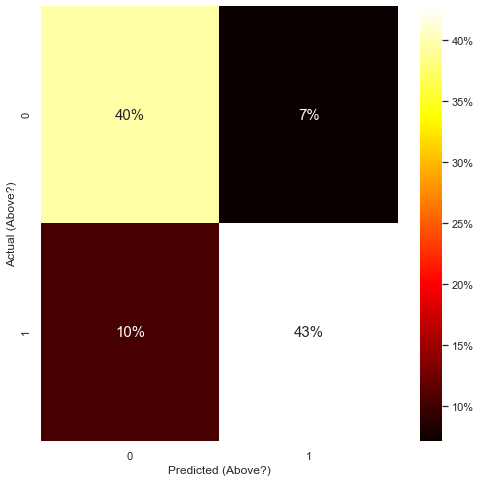

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_train, y_train)

y_pred=model.predict(X_test)
cnfmat = confusion_matrix(y_pred, y_test)

df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), index = np.unique(y_test))


df_cm.index.name = 'Actual (Above?)'
df_cm.columns.name = 'Predicted (Above?)'

sns.set(font_scale=1)

from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)


fig, ax = plt.subplots(figsize=(8,8)) # set plot size


sns.heatmap(df_cm/df_cm.sum().sum(),  # plot the heatmap
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );

##### To check the accurancy of the model the ROC was used

### 07 - Area Under the Curve

In [79]:
pred_prob = classification.predict_proba(X_test)

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label =1)# False Positive Rate & True Positive rate

Text(0, 0.5, 'True Positive rate')

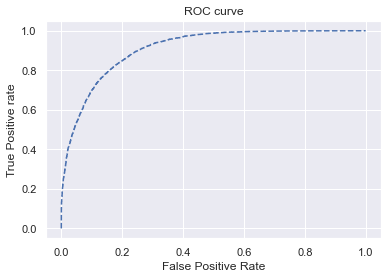

In [82]:
plt.plot(fpr, tpr, linestyle='--')
plt.title('ROC curve')

plt.xlabel('False Positive Rate')# x label

plt.ylabel('True Positive rate')# y label

### 08 - Decision tree 

##### Train and Split the data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [84]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [85]:
y_pred = classifier.predict(X_test)

##### Decisison Tree Classification report

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5389  845]
 [ 920 5206]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6234
           1       0.86      0.85      0.86      6126

    accuracy                           0.86     12360
   macro avg       0.86      0.86      0.86     12360
weighted avg       0.86      0.86      0.86     12360



### 08 - Confusion Matrix after applying Decision tree model

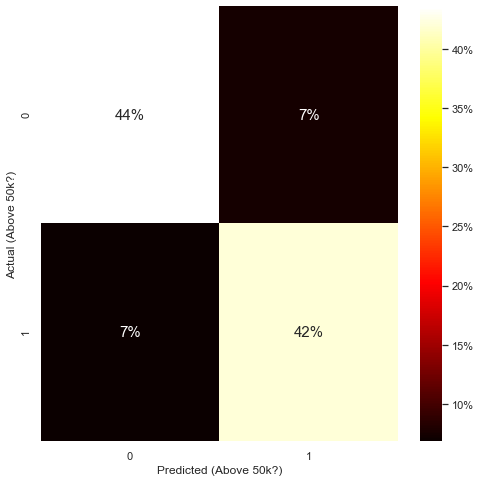

In [87]:
# This is the same repeated process as previously in the confusion matrix under logistic regression, only now is used after applying decision tree model.
cnfmat = confusion_matrix(y_pred, y_test)


df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test),index = np.unique(y_test))


df_cm.index.name = 'Actual (Above 50k?)'
df_cm.columns.name = 'Predicted (Above 50k?)'


sns.set(font_scale=1)


from matplotlib.ticker import FuncFormatter
fmt = lambda x,pos: '{:.0%}'.format(x)


fig, ax = plt.subplots(figsize=(8,8))


sns.heatmap(df_cm/df_cm.sum().sum(),  
            annot=True,
            fmt='.0%',
            cmap='hot',
            annot_kws={"size":15},
            cbar_kws={'format': FuncFormatter(fmt)}
           );


##### ROC is applied again under decision tree to check the accuracy of the prediction from the model

In [88]:
pred_prob = classification.predict_proba(X_test)

In [89]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label =1)

Text(0, 0.5, 'True Positive rate')

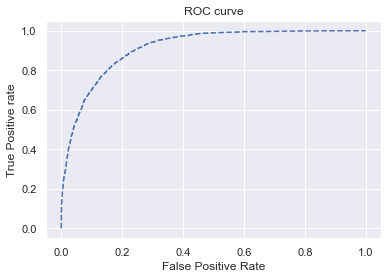

In [90]:
plt.plot(fpr, tpr, linestyle='--')
plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')